In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as me
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# create session from Python to the db
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [10]:
# `calc_temps` functions will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [11]:
# using 'calc_temps` function to calculate the tmin, tavg, and tmax 
# for a year in the data set, starting with 8/1/2017 as trip date
tmin,tavg,tmax = calc_temps('2016-08-23', '2017-08-23')[0]
print(tmin,tavg,tmax)

58.0 74.59058295964125 87.0


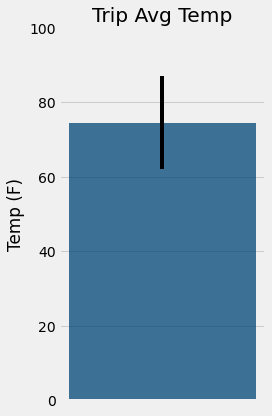

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig = plt.figure(figsize=(4,6))

plt.subplot()
plt.bar(x=0, height=tavg, yerr=(tmax-tavg), color='xkcd:prussian blue', alpha=.75)
plt.xticks([])
plt.ylim(0,100)
plt.ylabel("Temp (F)")
plt.title('Trip Avg Temp')
plt.tight_layout()
plt.show()

### Daily Rainfall Average

In [13]:
# calculating the total amount of rainfall per weather station for trip dates using the previous year's matching dates.
# sorted in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [station.name, station.latitude, station.longitude, station.elevation]
precip_data = session.query(*sel).filter(measurement.station == station.station )\
                       .filter(measurement.date.between('2016-08-07','2017-08-07'))\
                       .group_by(measurement.station)\
                       .order_by(measurement.prcp.desc()).all()

precip_df = me.DataFrame(precip_data, columns=['station','prcp','lat','lng'])
precip_df

,station,prcp,lat,lng
0,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
2,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
3,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
5,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
6,"PEARL CITY, HI US",21.39340,-157.97510,11.9


### Daily Temperature Normals

In [14]:
# use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [15]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
start_date = start_date.to_date()
# # Strip off the year and save a list of strings in the format %m-%d
trip_dates = [(start_date + dt.timedelta(days=i)).strftime("%m-%d") for i in range(trip_range)]

# # Use the `daily_normals` function to calculate the normals for each date string 
# # and append the results to a list called `normals`.
# normals = [daily_normals(date)[0] for date in trip_dates]
# normals

AttributeError: 'str' object has no attribute 'to_date'

In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [ ]:
# Plot the daily normals as an area plot with `stacked=False`

## Close Session

In [ ]:
session.close()